# Linear Regression using Gradient Descent and the Normal Equations to Predict the Weather in London After WW2.

Yash Patel, Noah Meininger, David DeVore, Caleb Emerson, George Rauta, Akanksh Jain

    Our goal with this project was to collect London weather data from 1935 to 1956, and, considering that WW2 took place from 1939 to 1945, see the effects that the War had on the weather in London. 

    We considered multiple factors in our linear regression as we recognized the difference between a relationship that fits the data well and a relationship that fits the trends shown by the data well. The factors we chose included longitude/

    latitude, air pollution, and population. Of these factors, our biggest interests was air pollution. WW2 had a large impact even after it ended due to its role in industrial expansion and the effects it had on the air quality (e.g: The Great Smog of London).

#### Resources

    Air-Pollution Data: https://ourworldindata.org/london-air-pollution
    
    Weather Data: https://digital.nmla.metoffice.gov.uk/index.php?name=SO_86058de1-8d55-4bc5-8305-5698d0bd7e13

    Population: https://tasks.illustrativemathematics.org/content-standards/tasks/1595

    Compiled Data on London: https://docs.google.com/spreadsheets/d/1cAUXhY3yODRw_qezb44WnIjhVe72IsirT_6N3nhgIYE/edit?                              usp=sharing

    Cross Validation@: https://www.geeksforgeeks.org/cross-validation-machine-learning/

    The Great Smog of London: https://www.britannica.com/event/Great-Smog-of-London

#### Normal Equation Model

    [latitude | longitude |  air pollution |  population] [X3 ; X4] = [T(1946-T1936) | T(1956-T1946)]

##### Gradient Descent Model

    ∇𝜙(𝐱)=2𝐉(𝐱)^(𝑇)𝐟(𝐱)

#### Our Data


In [ ]:
londonLat = 51.072;
londonLong = 0.1276;
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
airPollution1946 = [272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68]
population1935 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
population1946 = [7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800]
avgMaxTemp1936_1946 = [57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]
avgMinTemp1936_1946 = [44.95, 45.05, 46.3, 45.05, 44.925, 45.05, 45.05, 45.4, 45.05, 45.05, 45.05]
avgMaxTemp1946_1956 = [57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.25, 57.25, 57.25, 66]
avgMinTemp1946_1956 = [45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.225, 45.225, 40.225, 54]

#### Our Gradient Descent Implementation


    Gradient Descent - 1935:1946 - Pollution

In [ ]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935_1946 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946; 409.09 405.45 401.82 400 384.09 368.18 352.27 336.36 320.45 304.55 288.64 272.73]
X = X'

y = avgTemp1935_1946;
result = gradientDescent(X, y, 0.0000005, false, 5000)
f(year, pollution) = result[1] * year + result[2] * pollution

scatter(y, xlims = (0, 15), ylims = (45, 55))
plot!(f(years1935, airPollution1935_1946))

    Gradient Descent - 1935:1946 - Population

In [ ]:
using FundamentalsNumericalComputation
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
population1935_1946 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
normPopulation1935_1946 = normalize(population1935_1946)
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946; normPopulation1935_1946']
X = X'

y = avgTemp1935_1946;
result = gradientDescent(X, y, 0.0000005, false, 5000)
f(year, population) = result[1] * year + result[2] * population

scatter(y, xlims = (0, 15), ylims = (45, 55))
plot!(f(years1935, normPopulation1935_1946))

    Gradient Descent - 1945:1956 - Pollution

[1.0 -1.52542553961938 1.9015610928343767; 1.0 -1.2480754415067656 1.450499376229287; 1.0 -0.9707253433941511 0.9994376596241957; 1.0 -0.6933752452815365 0.5483759430191052; 1.0 -0.41602514716892186 0.0973142264140148; 1.0 -0.1386750490563073 -0.35374749019107565; 1.0 0.1386750490563073 -0.47367150409676567; 1.0 0.41602514716892186 -0.5938790263095619; 1.0 0.6933752452815365 -0.7138030402152528; 1.0 0.9707253433941511 -0.8340105624280482; 1.0 1.2480754415067656 -0.953934576333739; 1.0 1.52542553961938 -1.0741420985465344]


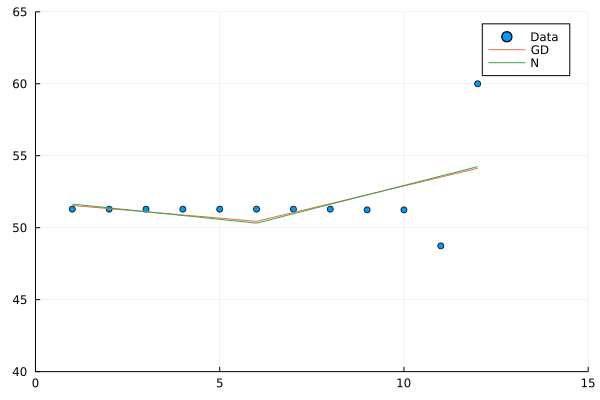

In [14]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

function normalizeData(v)
    return (v .- mean(v)) / std(v);
end

bias = ones(12)
year1945_1956 = [1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956];
airPollution1945_1956 = [288.64, 272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68];
avgTemp1945_1956 = [51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2875, 51.2375, 51.2375, 48.7375, 60];

year1945_1956 = normalizeData(year1945_1956)
airPollution1945_1956 = normalizeData(airPollution1945_1956)

X = [bias'; year1945_1956'; airPollution1945_1956'];
X = X';
println(X);

y = avgTemp1945_1956;
resultGD = gradientDescent(X, y, 1, false, 50);
fGD(year, pollution) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * pollution

resultN = X \ y;
fN(year, pollution) = resultN[1] .+ resultN[2] * year + resultN[3] * pollution

scatter(y, xlims = (0,15), ylims = (40,65), labels="Data")
plot!(fGD(year1945_1956, airPollution1945_1956), labels="GD")
plot!(fN(year1945_1956, airPollution1945_1956), labels="N")


    Gradient Descent - 1945:1956 - Population


[1.0 1935.0 7.5865; 1.0 1936.0 7.6126; 1.0 1937.0 7.638; 1.0 1938.0 7.6628; 1.0 1939.0 7.6869; 1.0 1940.0 7.7106; 1.0 1941.0 7.7336; 1.0 1942.0 7.756; 1.0 1943.0 7.78; 1.0 1944.0 7.7993; 1.0 1945.0 7.8201; 1.0 1946.0 7.8404]


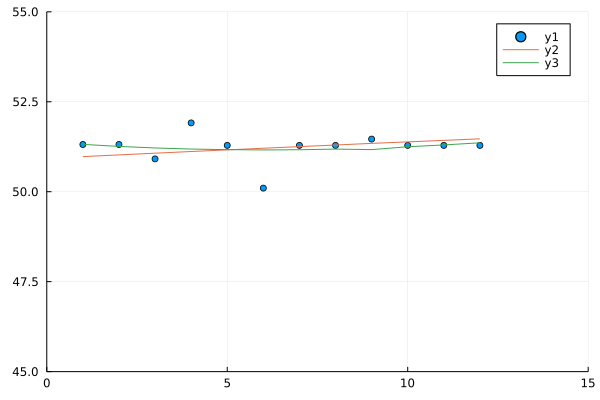

In [19]:
using Statistics
using Plots

function gradientDescent(x, y, α, fitted, numberOfIterations)
    m = length(y)
    if fitted
        C = ones(m, 1)    
        x = hcat(C,x)
    else
        x
    end
  
    n = size(x)[2]
    θ = ones(n)
  
    for i in range(1, stop=numberOfIterations)
        pred = x * θ
        #println(cost(x, y, θ))
        θ = θ - ((α/m) * x') * (pred - y)
    end
    return θ
  
end
  
function cost(x, y, θ)
    m = size(x)[1]
    loss = x * θ - y
    return (1/2length(y)) * loss' * loss
end

bias = ones(12)
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
population1935_1946 = [7586500/1000000, 7612600/1000000, 7638000/1000000, 7662800/1000000, 7686900/1000000, 7710600/1000000, 7733600/1000000, 7756000/1000000, 7780000/1000000, 7799300/1000000, 7820100/1000000, 7840400/1000000]
avgTemp1935_1946 = [51.3125, 51.3125, 50.9125, 51.9125, 51.2875, 50.1, 51.2875, 51.2875, 51.4625, 51.2875, 51.2875, 51.2875]

X = [bias'; years1935'; population1935_1946'];
X = X';
println(X);

y = avgTemp1935_1946;
resultGD = gradientDescent(X, y, 0.0000005, false, 5000)
fGD(year, population) = resultGD[1] .+ resultGD[2] * year + resultGD[3] * population

resultN = X \ y;
fN(year, population) = resultN[1] .+ resultN[2] * year + resultN[3] * population

scatter(y, xlims = (0, 15), ylims = (45, 55))
plot!(fGD(years1935, population1935_1946))
plot!(fN(years1935, population1935_1946))


        Our Normal Equation Implementation


In [ ]:
using FundamentalsNumericalComputation
using Statistics
using Plots

londonLat = 51.072;
londonLong = 0.1276;
years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
airPollution1946 = [288.64, 272.73, 256.82, 240.91, 225, 209.09, 204.86, 200.62, 196.39, 192.15, 187.92, 183.68]
population1935 = [7586500, 7612600, 7638000, 7662800, 7686900, 7710600, 7733600, 7756000, 7780000, 7799300, 7820100, 7840400]
population1946 = [7840400, 7860200, 7879500, 7898300, 7916600, 7934400, 7951800, 7968700, 7985200, 8001200, 8016800]
avgMaxTemp1936_1946 = [57.675, 57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]
avgMinTemp1936_1946 = [44.95, 45.05, 46.3, 45.05, 44.925, 45.05, 45.05, 45.4, 45.05, 45.05, 45.05]
avgMaxTemp1946_1956 = [57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.25, 57.25, 57.25, 66]
avgMinTemp1946_1956 = [45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.05, 45.225, 45.225, 40.225, 54]

deltaAirPollution = [405.45-409.09, 401.82-405.45, 400-401.82, 384.09-400, 368.18-384.09, 352.27-368.18, 336.36-352.27, 320.45-336.36, 304.55-320.45, 288.64-304.55, 272.73-288.64, 256.82-272.73, 240.91-256.82, 225-240.91, 209.09-225, 204.86-209.09, 200.62-204.86, 196.39-200.62, 192.15-196.39, 187.92-192.15, 183.68-187.92]
deltaPopulation =[26100, 25400, 24800, 24100, 23700, 23000, 22400, 24000, 19300, 20800, 20300, 19800, 19300, 18800, 18300, 17800, 17400, 16900, 16500, 16000, 15600]
londonLat21 = [londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat, londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat,londonLat, londonLat]
londonLong21 = [londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong, londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong,londonLong, londonLong]
A = [londonLat21 londonLong21 deltaAirPollution deltaPopulation]
b1 = [57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675,57.525-57.675]
b2 = [66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525,66-57.525]
b = [b1 b2]
x = A\b

X = airPollution1935\b1[1:12]
f1(x) = X * x + 57.65;
plot(f1, xlims = (250, 500), ylims=(56,60))
plot!(airPollution1935, avgMaxTemp1936_1946, seriestype = :scatter)


Error Analysis

    Flop Count Analysis

    Gradient Descent
    1. Compute X * Theta -> (n x d)(d x 1) ~ 2nd - n
    2. Compute alpha / m * X' ~ nd + 1
    3. Compute X * Theta - y ~ n
    4. Compute (alpha / m * X') * (X * Theta - y) -> (d x n)(n x 1) ~ 2nd - d
    5. Compute Theta - (alpha / m * X') * (X * Theta - y) ~ d
    6. Repeat the process for k interations

    Together there are approximately 5knd + k flops.

    Clearly the knd term dominates and so all together, 
    Gradient Descent will be ~O(knd).


    Normal Equations
    1. Compute X'X -> (d x n)(n x d) ~ 2(n-1)d^2
    2. Compute X'y -> (d x n)(n x 1) ~ 2(n-1)d
    3. Solve system X'X * theta = X'y using Cholskey ~ O(1/3 * d^3)

    Together there are approximately 2(n-1)d^2 + 2(n-1)d + O(1/3 * d^3) flops.

    since usually n >> d, 2(n-1)d^2 term dominates and so all together, 
    So Normal Equations are ~O(nd^2).

    Scaling Analysis

In [ ]:
using Plots

vals = [1000, 10000, 100000, 1000000, 5000000, 7500000, 10000000]
k = 1000

gradTime = []
normTime = []
for n in vals
  d = sqrt(n)
  push!(gradTime, (5 * k * n * d + k))
  push!(normTime, (2*(n-1)*d^2 + 2*(n-1)*d + 1/3 * d^3))

end
plot(vals, gradTime, labels= "Grad", title = "Flops for Gradiant Descent and Normal", xlabel = "Number of Data Points", ylabel = "Estimated Flops to Compute")
plot!(vals, labels= "Normal", normTime)
plot!(size=(1000,700))

    Gradient Descent Error Analysis

In [ ]:
function gradientDescent(x, y, α, fitted, numberOfIterations)
  m = length(y)
  if fitted
      C = ones(m, 1)    
      x = hcat(C,x)
  else
      x
  end

  n = size(x)[2]
  θ = ones(n)

  for i in range(1, stop=numberOfIterations)
      pred = x * θ
      println(cost(x, y, θ))
      θ = θ - ((α/m) * x') * (pred - y)
  end
  return θ

end

function cost(x, y, θ)
  m = size(x)[1]
  loss = x * θ - y
  return (1/2length(y)) * loss' * loss
end

function crossValidation(X, Y)
    gradientResiduals = []
    alpha = 0.0000005
    numberOfIterations = 5000
    for i in 1:10
      trainingSetX = vcat(X[1:i - 1, :], X[i + 1:end, :])
      trainingSetY = vcat(Y[1:i - 1], Y[i + 1:end])
      
      gradientCoeffs = gradientDescent(trainingSetX, trainingSetY, alpha, false, numberOfIterations)
      yHatGradient = predict(gradientCoeffs, X[i,:])
      push!(gradientResiduals, (yHatGradient-Y[i])^2)
    end
    
    x=1:10
    scatter(x, gradientResiduals, title = "Gradient Descent Squared Residuals", xlabel = "nth Excluded data point", ylabel = "Squared Residual for nth Model")
  end

  function predict(coeffs, x)
    return y=coeffs[1]*x[1] + coeffs[2]*x[2] 
  end

  years1935 = [1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946]
  airPollution1935 = [409.09, 405.45, 401.82, 400, 384.09, 368.18, 352.27, 336.36, 320.45, 304.55, 288.64, 272.73]
  avgMaxTemp1936 = [57.675, 56.775, 57.525, 57.525, 55.275, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525, 57.525]

  X = [1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946; 409.09 405.45 401.82 400 384.09 368.18 352.27 336.36 320.45 304.55 288.64 272.73]
  X = X'
  y = avgMaxTemp1936;

  crossValidation(X, y)

Application to Our Overall Problem

    We noticed that Gradient Descent was very valuable for, however obviously, re-adjusting when there are large deviances in the data.

    Furthermore, we noticed that air pollution was a better predictor before WW2, and population was a better predictor after WW2. This says a lot more about air pollution than it does for population. More
    
    specifically, this shows how much London's recovery from WW2 affected the air quality. 

Gradient-Descent vs. The Normal Equation

    The Normal Equation provided us with a 4x2 matrix, each row provides us with two coefficients that we can use to plot our linear regression. The plot that we did show was the only prediction that was remotely closs.

    Gradient-Descent, on the other hand, provided us with four accurate predictions corresponding to the relationsip between pollution and population and the weather in each of the two time frames (reference plots above). 

    Considering that the normal equation has a higher flop count when you scale the problem as well as less accuracy and more error, it is much less valuable for linear regression. Gradient-Descent should be preffered over the normal equation, especially when you begin to exceed 7.5x10^6 data points.